In [2]:
import pandas as pd
from ivpy import attach,show,montage,histogram,scatter,compose

In [3]:
DIR = "/Users/damoncrockett/ivpy-datasets/vangogh/"
df = pd.read_csv(DIR+"images.csv")

In [4]:
df.Filename = [DIR+item for item in df.Filename]

In [5]:
attach(df,'Filename')

# scatter( )

While histograms have a single data axis, scatterplots have two. Both 'xcol' and 'ycol' now specify proper axes, and there is no binning (at least, not natively) and no 'ascending' arguments. Unlike montages and histograms, image scatterplots confront a real problem of occlusion:

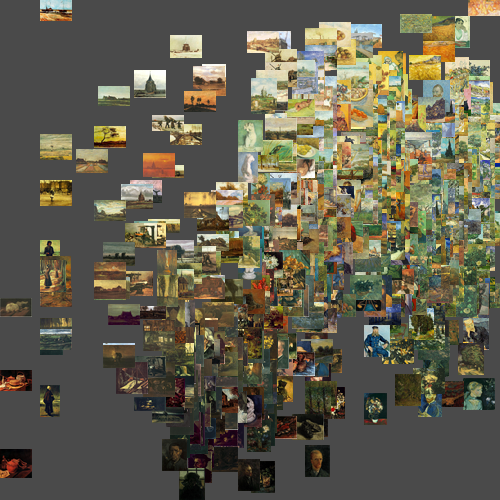

In [6]:
scatter('Year_Month','Brightness_Median')

The general trend here is still readable, but many individual images are now fully or partially hidden by others. The function arguments provide several ways of dealing with this. The first, which we've seen already, is to change the thumbnail size:

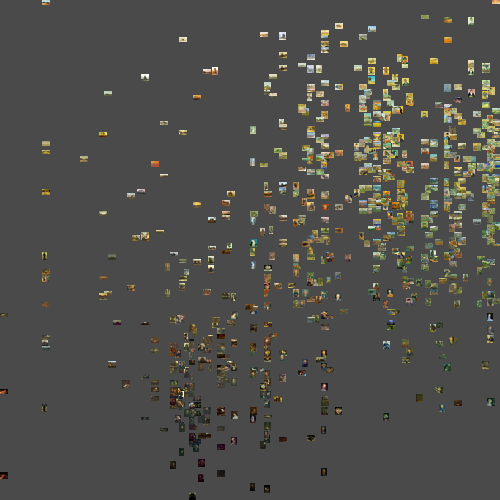

In [7]:
scatter('Year_Month','Brightness_Median',thumb=8)

### side

This certainly helps, although now the images are so small, they're difficult to read. Instead of changing the thumbnail size, we can also increase the plot canvas using 'side'. Note that 'side' adjusts both x and y together, and ivpy enforces a square for all scatterplots. 

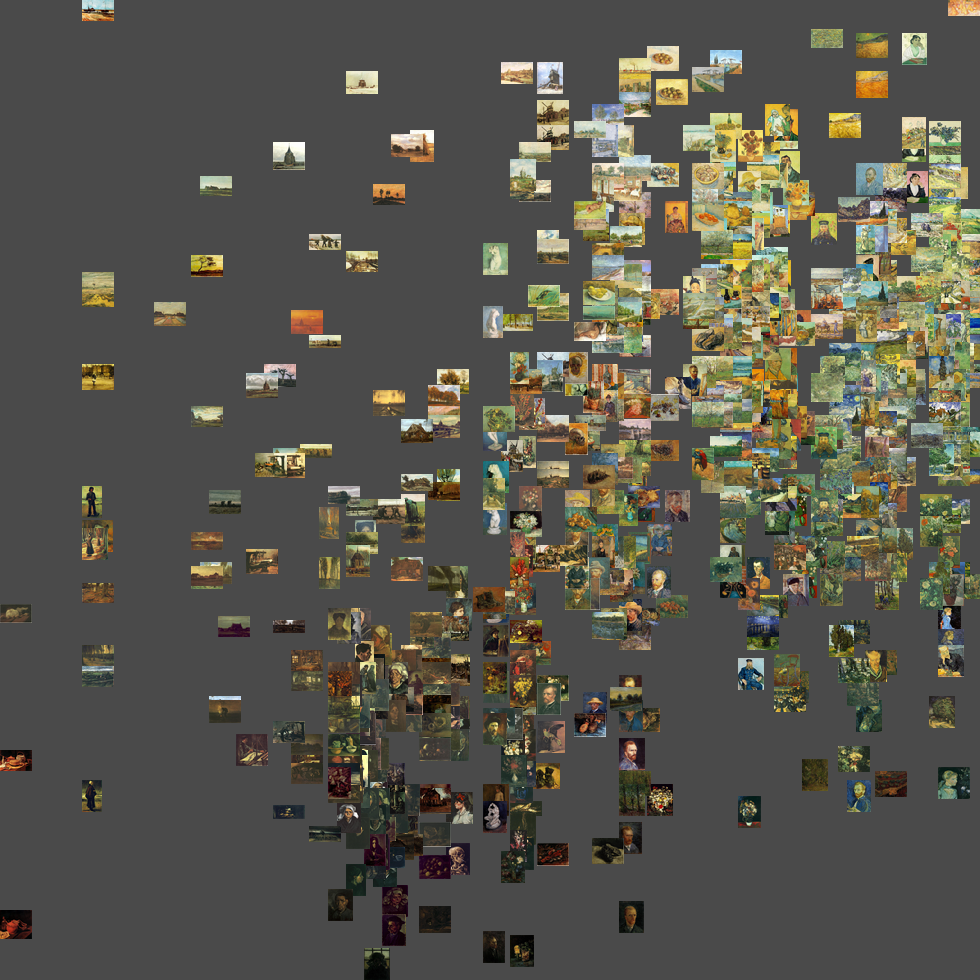

In [8]:
scatter('Year_Month','Brightness_Median',side=980)

### xbins and ybins

Above we said that scatterplots have no "native" binning, but ivpy can bin either or both axes using 'xbins' and 'ybins'. Arguably, what results is no longer a strict scatterplot, but it will be useful in some cases. Note that this doesn't really solve the problem of occlusion, but rather makes it a bit tidier.  

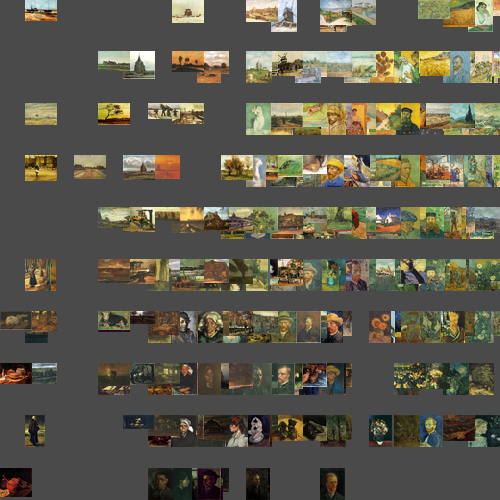

In [14]:
scatter('Year_Month','Brightness_Median',xbins=20,ybins=10)

Note that if we set 'xbins' and 'ybins' to the same number, we get something like a grid, and if we set 'thumb' and 'side' so that bins * thumb = side, we get a perfect grid:

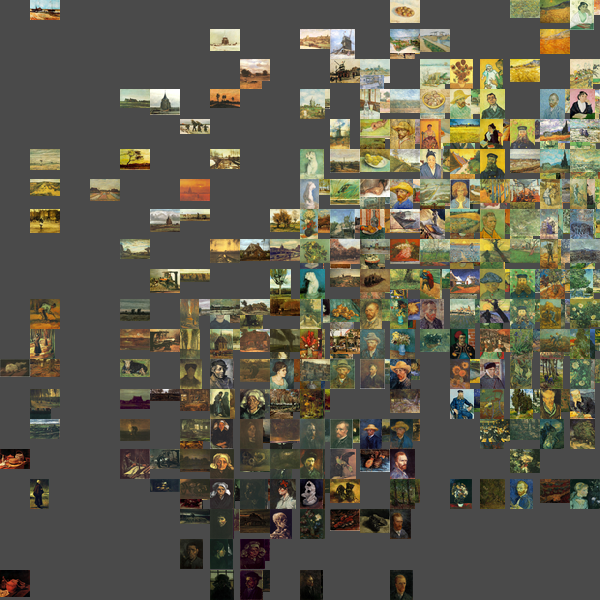

In [16]:
scatter('Year_Month','Brightness_Median',xbins=20,ybins=20,thumb=30,side=600)

### xdomain and ydomain

Just as 'xdomain' can be used with histogram( ) to effect domain expansion (and, if used across multiple plots, domain-fixing), _both_ 'xdomain' and 'ydomain' can be used this way with scatter( ). Let's say we want to generate a plot of van Gogh's paintings from 1880 to 1900, between pure black and pure white. We might do this in order to compare his work with that of another artist, one who painted between those years and perhaps used a wider brightness spectrum. We can use 'xdomain' and 'ydomain' to ensure the axis ranges are fixed:

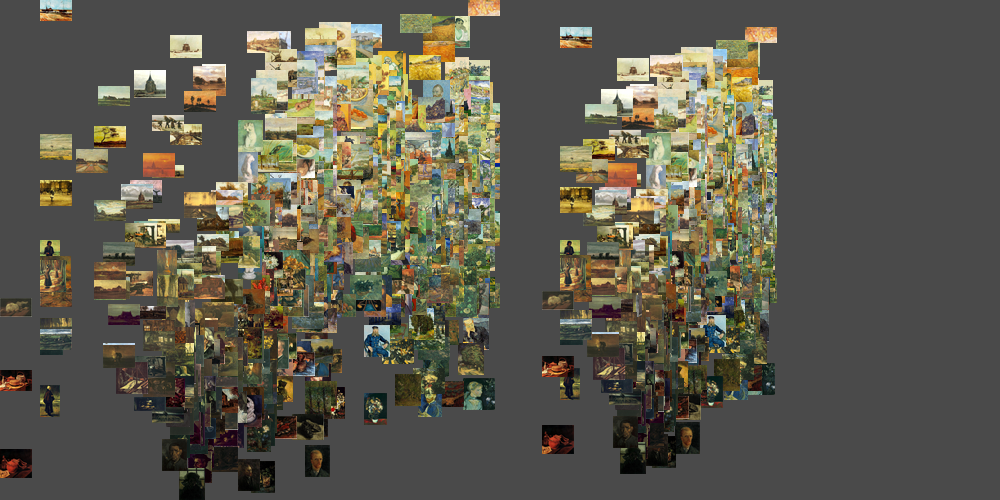

In [22]:
data_range = scatter('Year_Month','Brightness_Median')
expanded_range = scatter('Year_Month','Brightness_Median',xdomain=(1880,1900),ydomain=(0,255))
compose(data_range,expanded_range)

On the left, the axes are determined by the data we give it; on the right, by the new boundaries we chose. The plot on the right looks squished, because its x-axis now spans a much larger range.

### facetcol

As before, domains will stay fixed across facets:

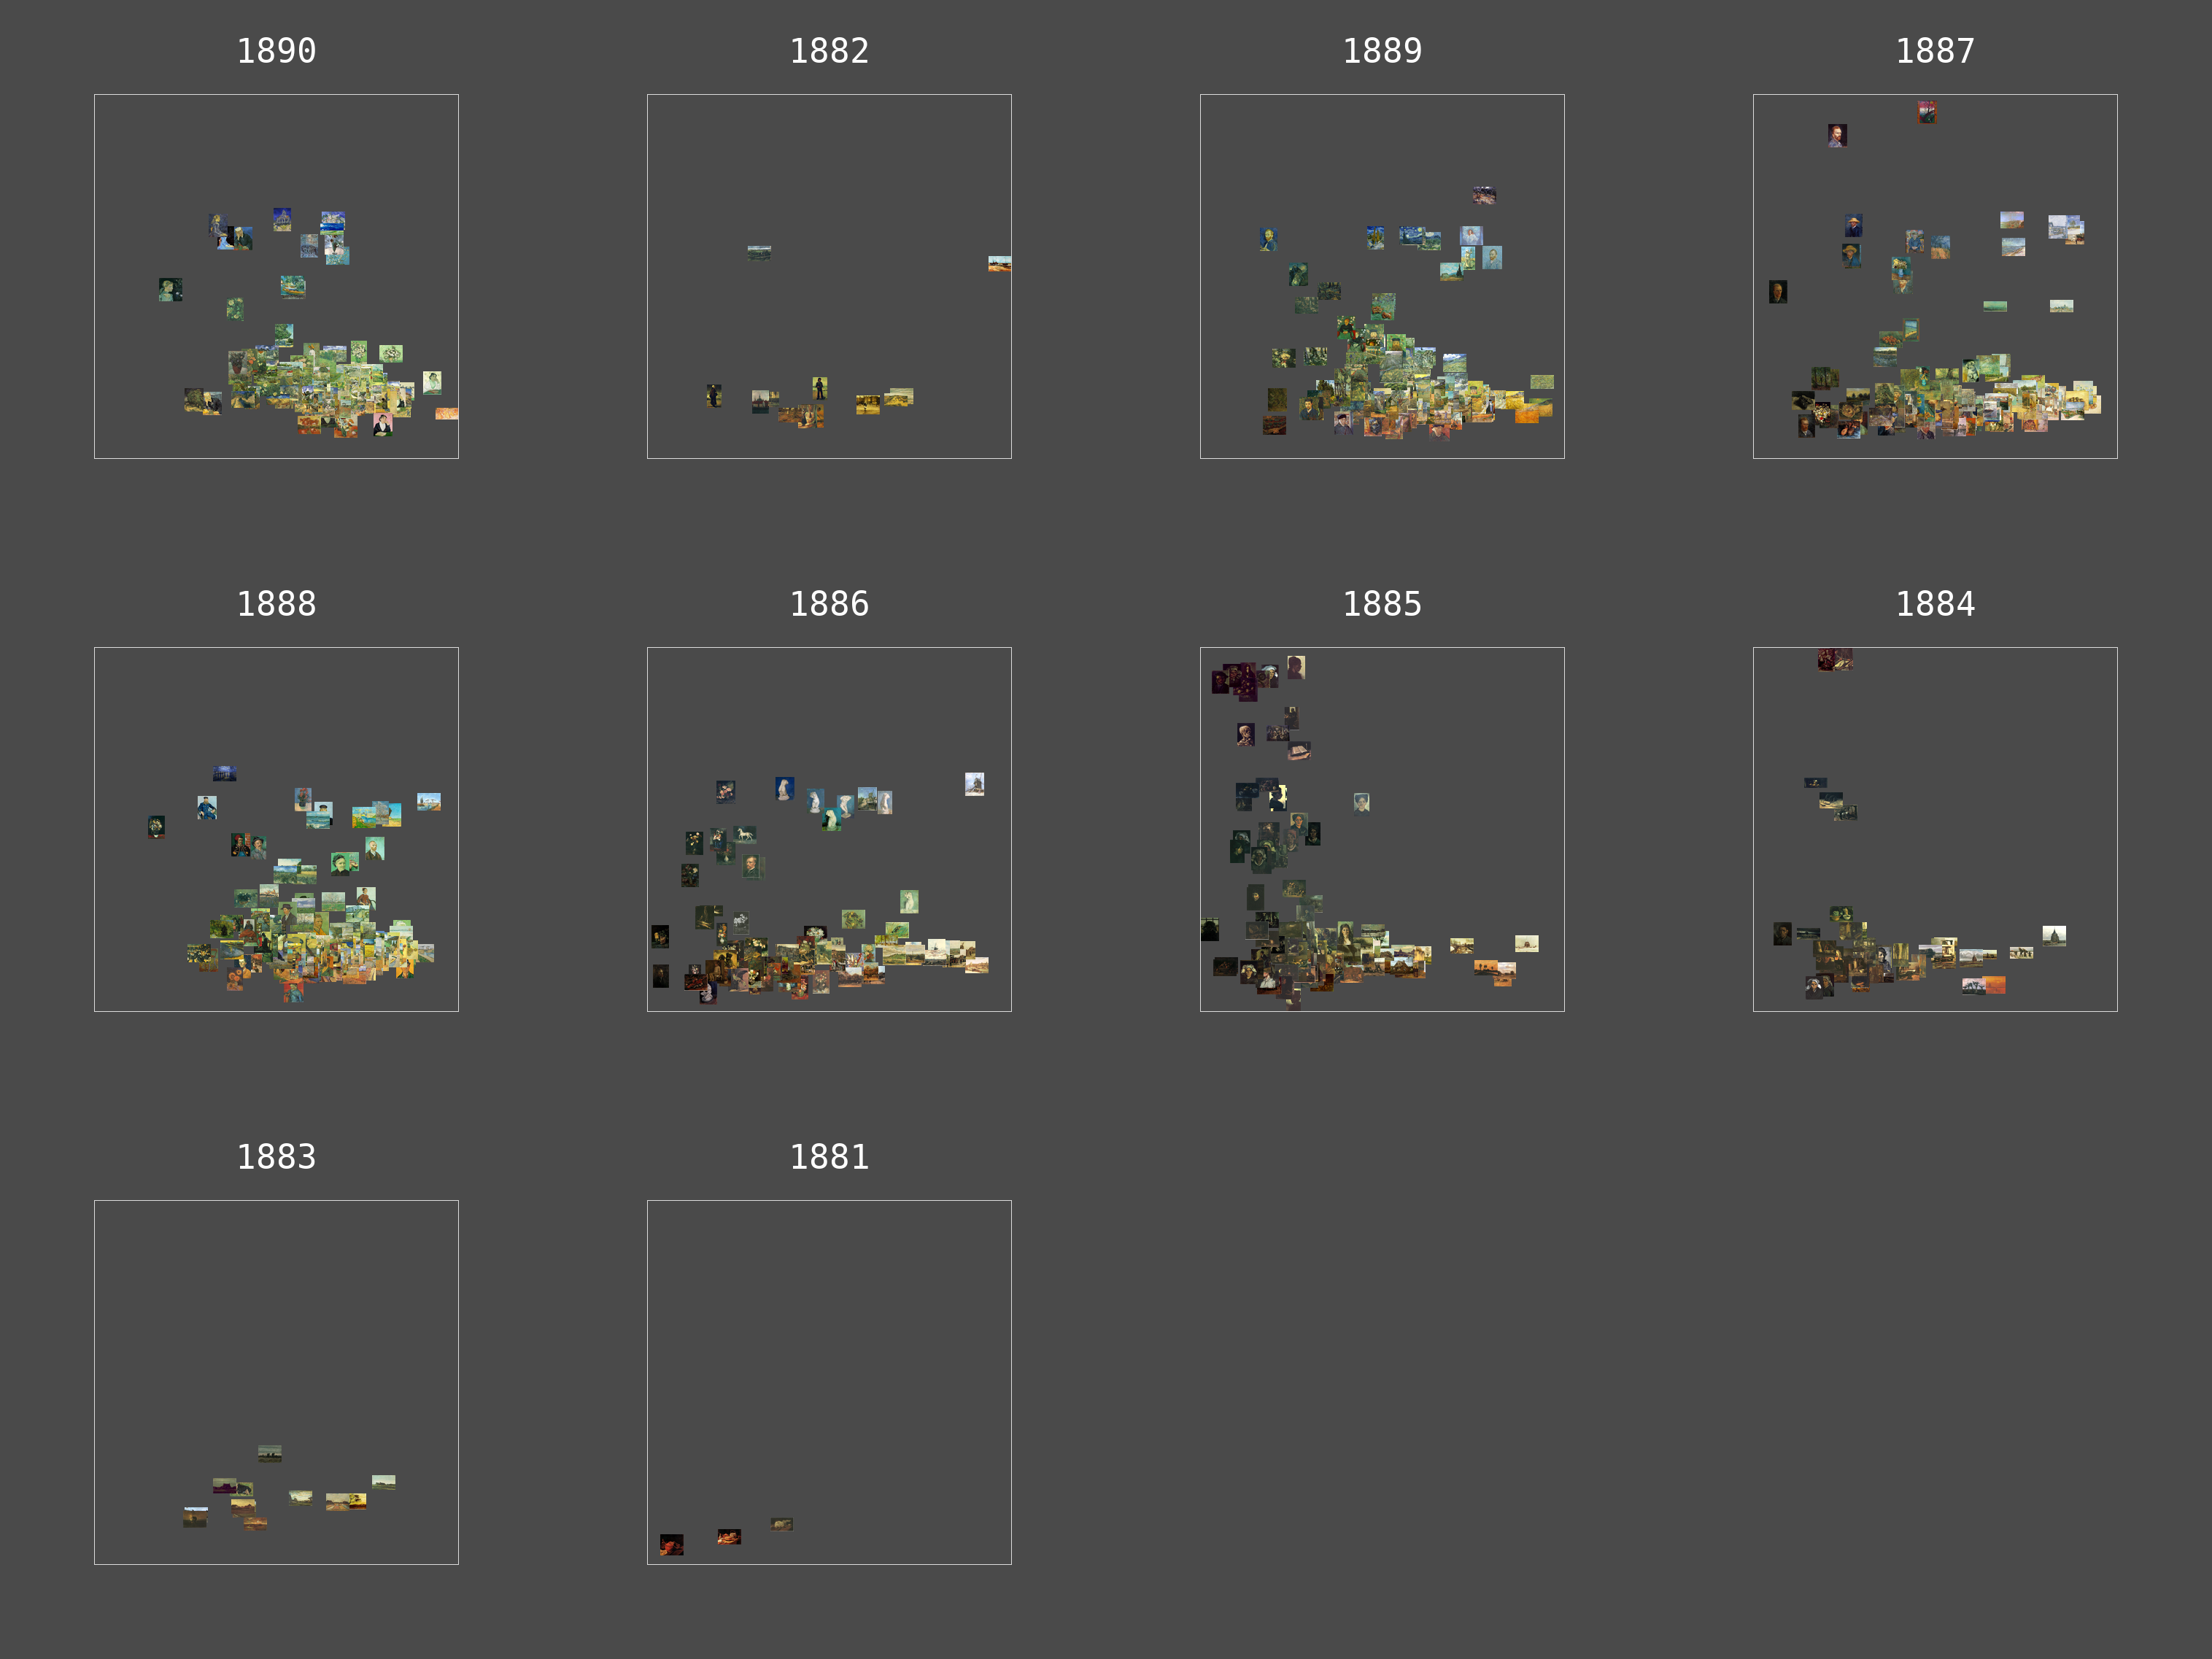

In [23]:
scatter('Brightness_Median','hue_peak',facetcol='Year')

### coordinates

Like the histogram, the scatterplot defaults to Cartesian coordinates but has a polar form as well:

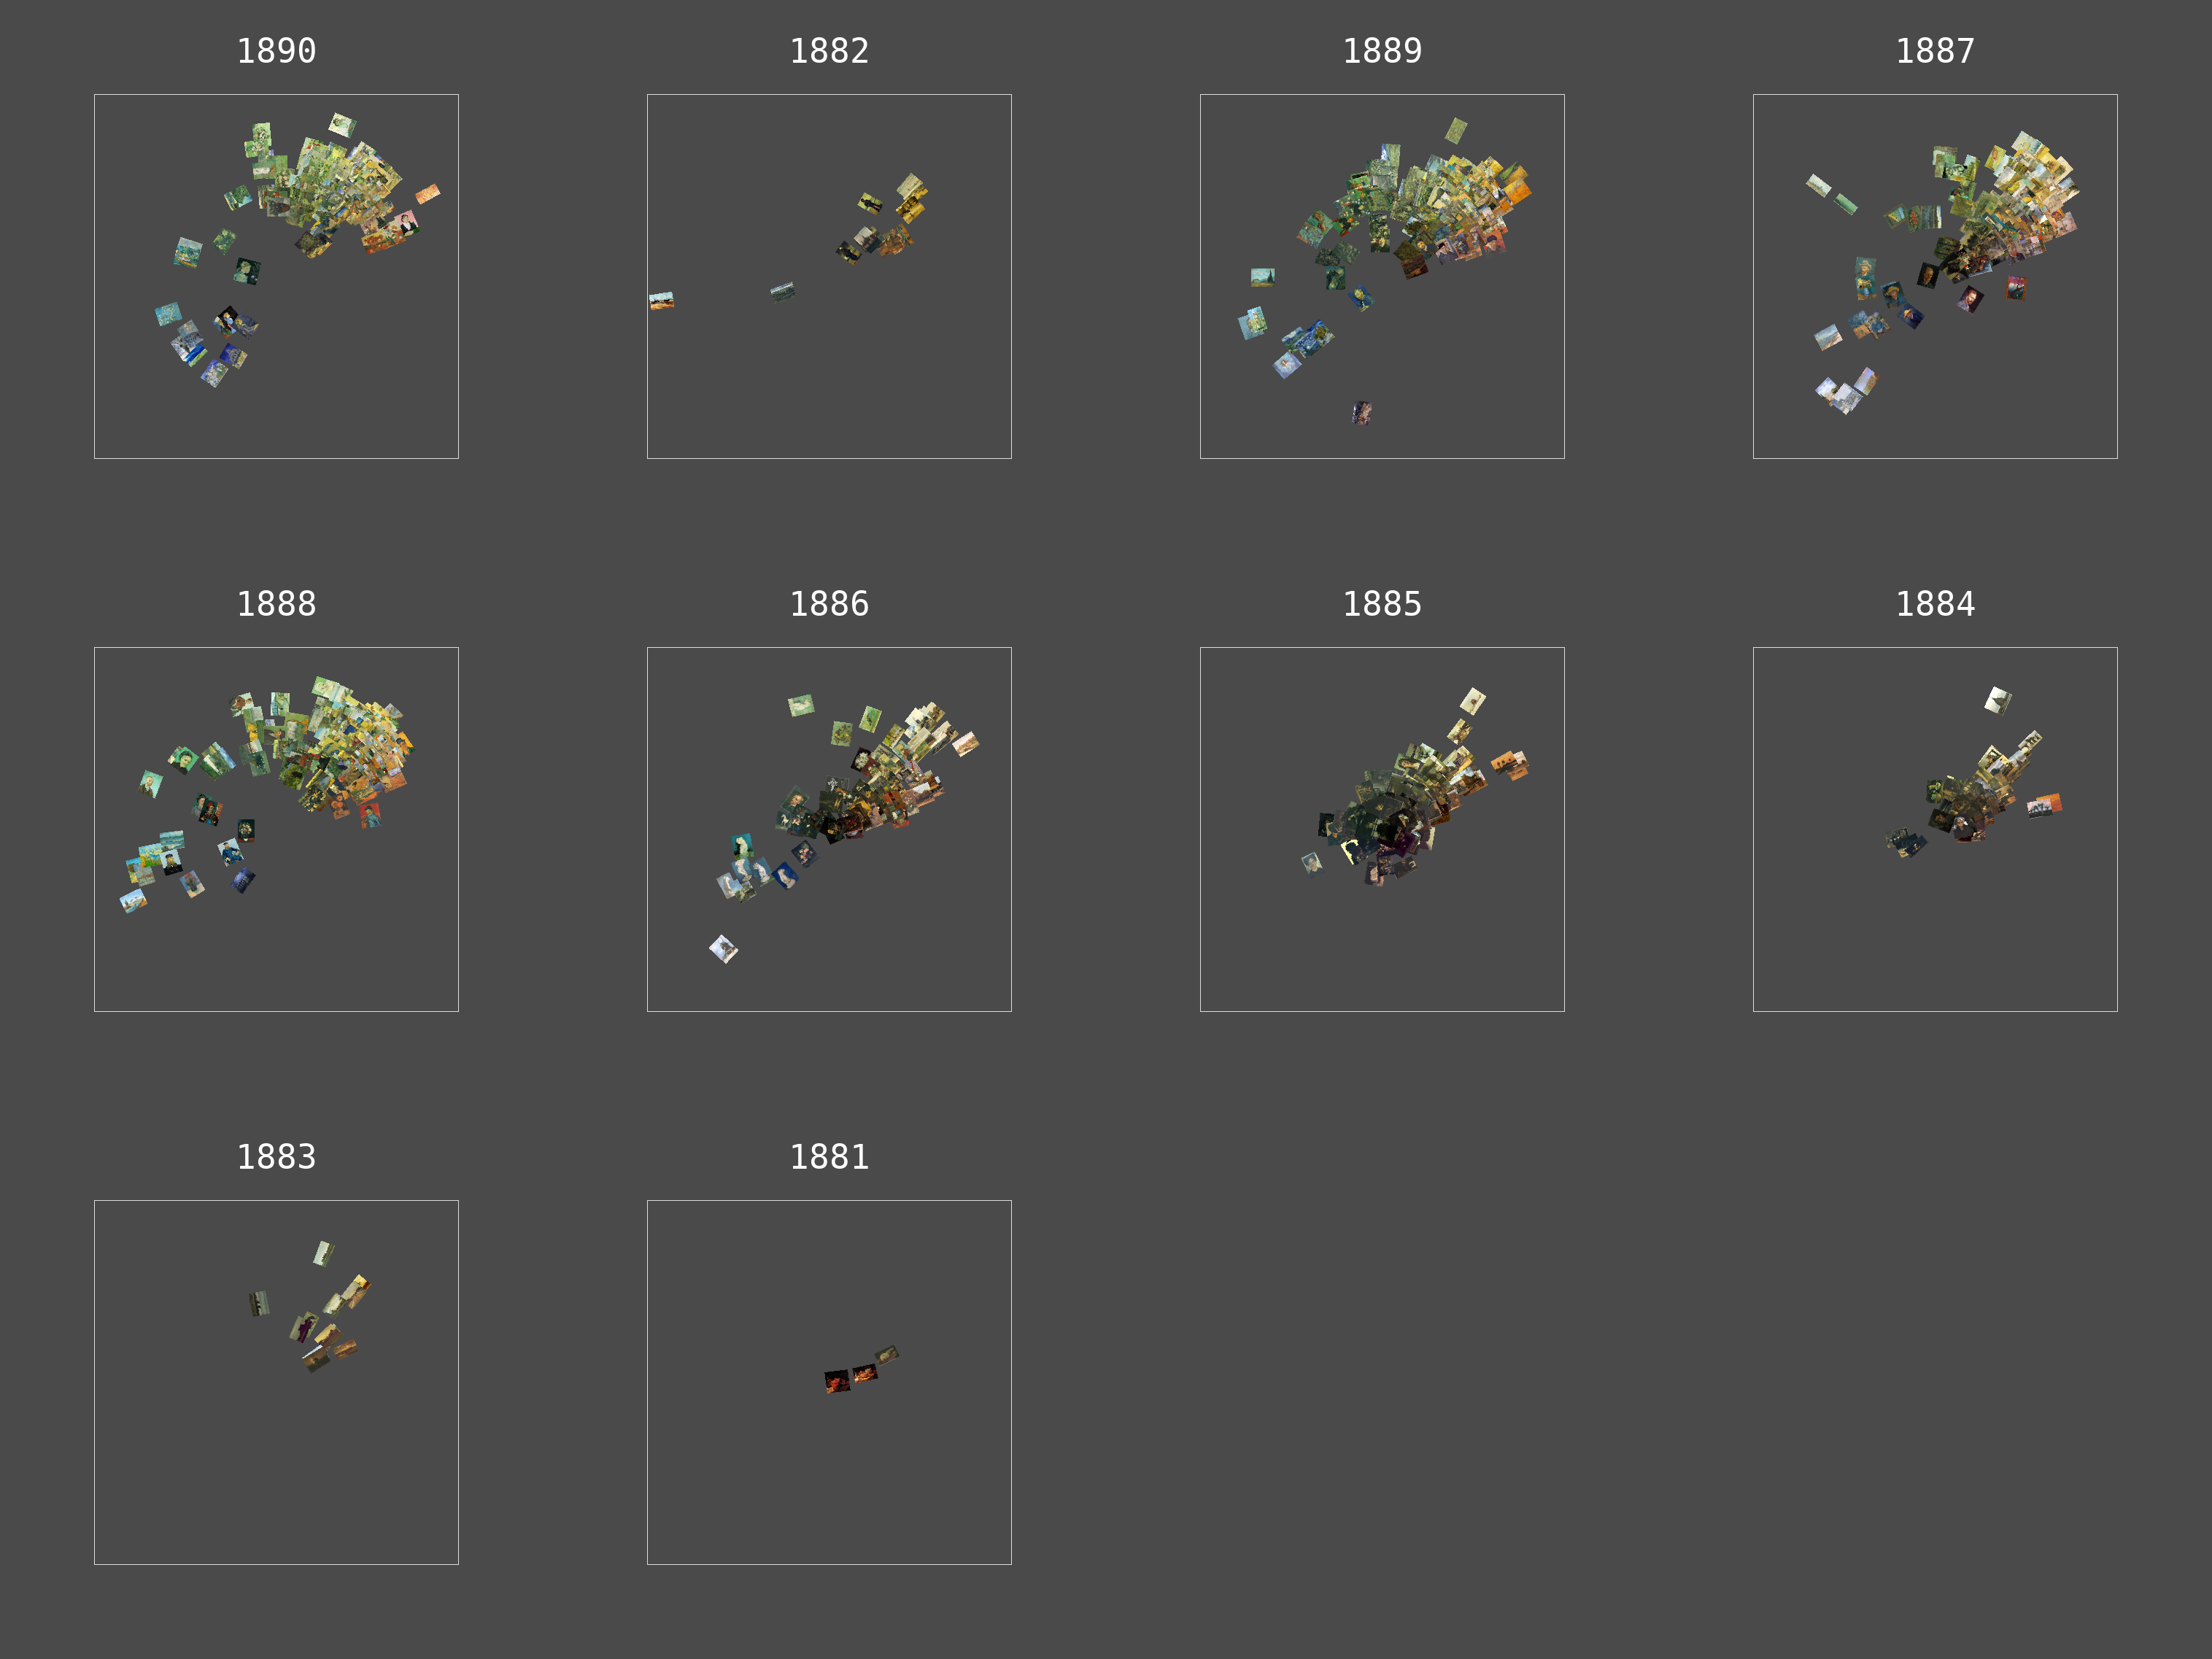

In [24]:
scatter('Brightness_Median','hue_peak',facetcol='Year',coordinates='polar')